In [ ]:
import numpy as np 
import pywrapfst as fst 
from learning_funcs import word2trans_matrix, WFA_func, WFA_SPEC_DECOMP, DFA2FST


# Define the WFA transition matrices A_a, A_b, A_c
A_a = np.array([[0, 1/3], [1/3, 1/2]])
A_b = np.array([[1/2, 2/3], [0, 0]])
A_c = np.array([[1/2, 0], [2/3, 1/2]])

# Concatenate the transition matrices
A_array = np.dstack( (A_a, A_b, A_c) )

# Define a word to evaluate
word = [1, 2, 1]

# Evaluate the transition matrix for the word using the WFA
A_word = word2trans_matrix(word, A_array)

# Print the resulting transition matrix
print(A_word)

In [ ]:

# WFA test script for simple probabilistic FA
A_a = np.array([[0, 1/3], [1/3, 1/2]])
A_b = np.array([[1/2, 2/3], [0, 0]])
A_c = np.array([[1/2, 0], [2/3, 1/2]])
a_0 = np.array([[1/2], [1/2]])
b_inf = np.array([[0], [1]])
A_array = np.concatenate((A_a, A_b, A_c), axis=1)

word = [1, 1]
w = WFA_func(word, a_0, A_array, b_inf)

In [ ]:
# Example from the paper
A_a = np.array([[3/4, 0], [0, 1/3]])
A_b = np.array([[6/5, 2/3], [3/4, 1]])

a_0 = np.array([ [1/2, 1/2] ])
b_inf = np.array([ [1] , [-1] ])
A_array = np.dstack((A_a, A_b))
word1 = [1]
word2 = [2]
word11 = [1, 1]
word12 = [1, 2]
word21 = [2, 1]
word22 = [2, 2]

w1 = WFA_func(word1, a_0, A_array, b_inf)
w2 = WFA_func(word2, a_0, A_array, b_inf)
w11 = WFA_func(word11, a_0, A_array, b_inf)
w12 = WFA_func(word12, a_0, A_array, b_inf)
w21 = WFA_func(word21, a_0, A_array, b_inf)
w22 = WFA_func(word22, a_0, A_array, b_inf)

In [ ]:
import numpy as np 
import pywrapfst as fst 
from learning_funcs import word2trans_matrix, WFA_func, WFA_SPEC_DECOMP, DFA2FST

A_a = np.array([ [3/4, 0], [0, 1/3] ])
A_b = np.array([ [6/5, 2/3], [3/4, 1] ])

a_0 = np.array([ [1/2, 1/2] ])
b_inf = np.array([ [1], [-1] ])
A_array = np.stack( (A_a, A_b), axis=2)
word1 = [1]
word2 = [2]
word11 = [1, 1]
word12 = [1, 2]
word21 = [2, 1]
word22 = [2, 2]

w1 = WFA_func(word1, a_0, A_array, b_inf)
w2 = WFA_func(word2, a_0, A_array, b_inf)
w11 = WFA_func(word11, a_0, A_array, b_inf)
w12 = WFA_func(word12, a_0, A_array, b_inf)
w21 = WFA_func(word21, a_0, A_array, b_inf)
w22 = WFA_func(word22, a_0, A_array, b_inf)
H_z = np.zeros((3, 3, 3))
H_z[0, :, 0] = [0, 20, 14]  # H_b(e,:)
H_z[1, :, 0] = [20, 22, 15]  # H_b(a,:)
H_z[2, :, 0] = [14, 45, 31]  # H_b(b,:)
H_z[0, :, 1] = [20, 22, 15]  # H_b(ea,:)
H_z[1, :, 1] = [22, 19, 13]  # H_b(aa,:)
H_z[2, :, 1] = [45, 45, 32]  # H_b(ba,:)
H_z[0, :, 2] = [14, 45, 31]  # H_b(b,:)
H_z[1, :, 2] = [15, 29, 20]  # H_b(ab,:)
H_z[2, :, 2] = [31, 85, 58]  # H_b(bb,:)
H_z = H_z / 100
num_states = 2
num_letters = 2
a_0t, A_arrayt, b_inft, P = WFA_SPEC_DECOMP(H_z)

w1t  = WFA_func(word1, a_0t, A_arrayt, b_inft)
w2t  = WFA_func(word2, a_0t, A_arrayt, b_inft)
w11t = WFA_func(word11, a_0t, A_arrayt, b_inft)
w12t = WFA_func(word12, a_0t, A_arrayt, b_inft)
w21t = WFA_func(word21, a_0t, A_arrayt, b_inft)
w22t = WFA_func(word22, a_0t, A_arrayt, b_inft)


In [ ]:
np.linalg.matrix_rank( H_z[: ,: , 0] )

In [ ]:
import numpy as np 
import pywrapfst as fst 
from learning_funcs import word2trans_matrix, WFA_func, WFA_SPEC_DECOMP
from learning_funcs import DFA2FST, inverse_cantor_pairing, cantor_pairing

A1 = np.zeros((3,3))
A2 = np.zeros((3,3))
A3 = np.zeros((3,3))

A1[0, 1] = 1
A1[1, 0] = 1

A2[1, 2] = 1

A3[0, 2] = 1
A_array = np.stack((A1, A2, A3), 2)
a_0   = np.array([ [0, 1, 0] ])
b_inf = np.array([ [1], [1], [1] ])

f, FST_array = DFA2FST(a_0, A_array, b_inf)
f.minimize()

In [ ]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()

#actuator attack
attack     = periodic_attacker( itab, ikey, 4 )
attack_inv = attack.copy().invert().arcsort()

desired_inv = desired.copy().invert().arcsort()
sup  = fst.compose( desired_inv, attack_inv ).arcsort()
supc = fst.compose( sup, attack ).arcsort()
 
control = supc.copy().invert().arcsort()

control_auto = fst2auto( control )
desired_auto = fst2auto( desired.arcsort() )
fst.equivalent(control_auto , desired_auto)

In [1]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()

#sensor attack
attack     = periodic_attacker( tab, key, 2 )
attack_inv = attack.copy().invert().arcsort()

desired_inv = desired.copy().invert().arcsort() 
sup  = fst.compose(  attack_inv, desired_inv ).arcsort()
supc = fst.compose( attack, sup ).arcsort()
 
control = supc.copy().invert().arcsort()

control_auto = fst2auto( control )
control_auto = control_auto.minimize().arcsort()

desired_auto = fst2auto( desired.arcsort() )
fst.equivalent(control_auto , desired_auto)

True

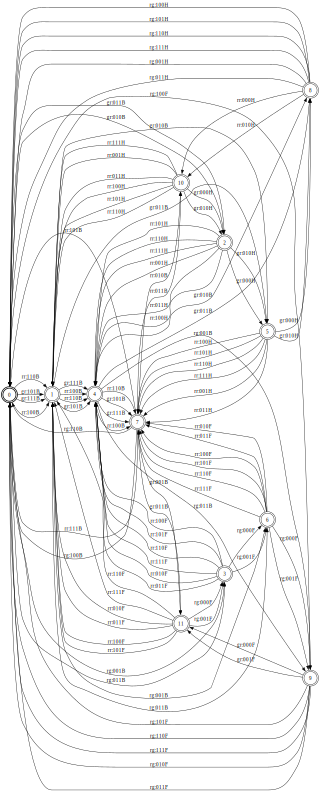

In [13]:
#cell to play with sensor and actuator attacks
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang
from funcs import supervisor

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()
MK = desired.copy()
#double attack
As = periodic_attacker( tab, key, 3 )
Aa = periodic_attacker( itab, ikey, 3)

Sup, MK_auto, control_auto, controllable = \
      supervisor(MK=desired,P=desired,As=As,Aa=None)

# Save the plot to a file with custom width and height
Sup




In [1]:
from learning_funcs import alphabet2mask, mask2Hz_word 

Alphabet = ['epsilon', 'a', 'b', 'c']
max_word_length = 2
p, s = alphabet2mask(Alphabet, max_word_length)
Hz, Hb = mask2Hz_word(p, s, Alphabet=Alphabet)
Hb[0,:]

array(['', 'a', 'b', 'c', 'aa', 'ab', 'ac', 'ba', 'bb', 'bc', 'ca', 'cb',
       'cc'], dtype='<U4')

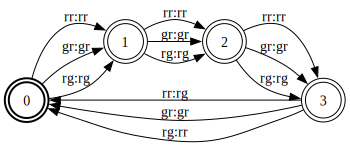

In [1]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang, fst2word, fst2word_list
from learning_funcs import auto2Hz, auto2Hz2, DFA2FST, WFA_SPEC_DECOMP, dfs, auto_paths, auto2basis, auto2small_basis
from TL_funcs import fst2auto, fst2tables 

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()


#sensor atttack 
As               = periodic_attacker( tab, key, 3 )
As_auto = fst2auto( As )

#actuator atttack 
Aa               = periodic_attacker( itab, ikey, 2 )
Aa_auto = fst2auto( Aa )

input_table, output_table, \
    input_alphabet, output_alphabet, \
    input_key_list, output_key_list\
    = fst2tables( As )
    
_, _, \
    _, _, \
    auto_key_list, _\
    = fst2tables( As_auto )

# P, S, word_list, Hb_word, Hb_array, Hb_list, Hb_word_big = auto2small_basis(As_auto)
Hz_array, Hz_word_array, word_list = auto2Hz2( As_auto )
# Hz_array_act, Hz_word_array, word_list = auto2Hz2( Aa_auto )

t0, T_array, tf, P = WFA_SPEC_DECOMP( Hz_array )
f, f_array = DFA2FST(t0, T_array, tf, \
    input_table, output_table, auto_key_list )
f 


In [1]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang, fst2word, fst2word_list
from learning_funcs import auto2Hz, auto2Hz2, DFA2FST, WFA_SPEC_DECOMP, dfs, auto_paths, auto2basis, auto2small_basis
from TL_funcs import fst2auto, fst2tables 

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()


#sensor atttacks 
As2               = periodic_attacker( tab, key, 2 )
As2_auto = fst2auto( As2 )

As3               = periodic_attacker( tab, key, 3 )
As3_auto = fst2auto( As3 )

As4               = periodic_attacker( tab, key, 4 )
As4_auto = fst2auto( As4 )

As5               = periodic_attacker( tab, key, 5 )
As5_auto = fst2auto( As5 )

#actuator atttacks 
# Aa2               = periodic_attacker( itab, ikey, 2 )
# Aa2_auto = fst2auto( Aa2 )

# Aa3               = periodic_attacker( itab, ikey, 3 )
# Aa3_auto = fst2auto( Aa3 )

# Aa4               = periodic_attacker( itab, ikey, 4 )
# Aa4_auto = fst2auto( Aa4 )

# input_table, output_table, \
#     input_alphabet, output_alphabet, \
#     input_key_list, output_key_list\
#     = fst2tables( As )
    
# _, _, \
#     _, _, \
#     auto_key_list, _\
#     = fst2tables( As_auto )

# Pnew, Snew, _, _, _, _, _ = auto2small_basis(As_auto)
Hz_array2, Hz_word_array, word_list = auto2Hz2( As2_auto )
Hz_array3, Hz_word_array, word_list = auto2Hz2( As3_auto )
Hz_array4, Hz_word_array, word_list = auto2Hz2( As4_auto )
# Hz_array5, Hz_word_array, word_list = auto2Hz2( As5_auto )

# Hz_array_act2, Hz_word_array, word_list = auto2Hz2( Aa2_auto )
# Hz_array_act3, Hz_word_array, word_list = auto2Hz2( Aa3_auto )
# Hz_array_act4, Hz_word_array, word_list = auto2Hz2( Aa4_auto )


In [7]:
import timeit
import statistics
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang, fst2word, fst2word_list
from learning_funcs import auto2Hz, auto2Hz2, DFA2FST, WFA_SPEC_DECOMP, dfs, auto_paths, auto2basis, auto2small_basis
from TL_funcs import fst2auto, fst2tables 
from funcs import supervisor
# Define a wrapper function to pass the inputs
def wrapper2():
    return WFA_SPEC_DECOMP( Hz_array2 )
def wrapper3():
    return WFA_SPEC_DECOMP( Hz_array3 )
def wrapper4():
    return WFA_SPEC_DECOMP( Hz_array4 )
# def wrapper5():
#     return WFA_SPEC_DECOMP( Hz_array5 )

def sup_wrapper2():
    return supervisor(MK=desired,P=desired,As=As2,Aa=None)
def sup_wrapper3():
    return supervisor(MK=desired,P=desired,As=As3,Aa=None)
def sup_wrapper4():
    return supervisor(MK=desired,P=desired,As=As4,Aa=None)

number = 1
repeat = 10000
# Measure the runtime of the wrapper function
# runtime = timeit.timeit(wrapper, number=10)

# Run the function using timeit
execution_times2 = timeit.repeat(wrapper2, setup="from __main__ import wrapper2", repeat=repeat, number=number)
execution_times3 = timeit.repeat(wrapper3, setup="from __main__ import wrapper2", repeat=repeat, number=number)
execution_times4 = timeit.repeat(wrapper4, setup="from __main__ import wrapper2", repeat=repeat, number=number)

sup_execution_times2 = timeit.repeat(sup_wrapper2, setup="from __main__ import wrapper2", repeat=repeat, number=number)
sup_execution_times3 = timeit.repeat(sup_wrapper3, setup="from __main__ import wrapper2", repeat=repeat, number=number)
sup_execution_times4 = timeit.repeat(sup_wrapper4, setup="from __main__ import wrapper2", repeat=repeat, number=number)

# Calculate standard deviation
std_dev2 = statistics.stdev(execution_times2)
std_dev3 = statistics.stdev(execution_times3)
std_dev4 = statistics.stdev(execution_times4)

sup_std_dev2 = statistics.stdev(sup_execution_times2)
sup_std_dev3 = statistics.stdev(sup_execution_times3)
sup_std_dev4 = statistics.stdev(sup_execution_times4)

avg_runtime2 = statistics.mean(execution_times2)
avg_runtime3 = statistics.mean(execution_times3)
avg_runtime4 = statistics.mean(execution_times4)

sup_avg_runtime2 = statistics.mean(sup_execution_times2)
sup_avg_runtime3 = statistics.mean(sup_execution_times3)
sup_avg_runtime4 = statistics.mean(sup_execution_times4)

print("Average runtime:", avg_runtime2)
print("Average runtime:", avg_runtime3)
print("Average runtime:", avg_runtime4)
print("Standard deviation:", std_dev2)
print("Standard deviation:", std_dev3)
print("Standard deviation:", std_dev4)


Average runtime: 0.00026932940999649873
Average runtime: 0.0012555608099917663
Average runtime: 0.0022646804200132467
Standard deviation: 0.00011322015224906758
Standard deviation: 0.0005395233678524014
Standard deviation: 0.0007828109568149782


In [6]:
from TL_funcs import print_fst
print_fst( f )


State 0:
  Transition: rr -> rr, Next State: 1
  Transition: gr -> gr, Next State: 1
  Transition: rg -> rg, Next State: 1
State 1:
  Transition: rr -> rr, Next State: 2
  Transition: gr -> gr, Next State: 2
  Transition: rg -> rg, Next State: 2
State 2:
  Transition: rr -> rg, Next State: 0
  Transition: gr -> rr, Next State: 0
  Transition: rg -> gr, Next State: 0


In [ ]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang, fst2word, fst2word_list
from learning_funcs import auto2Hz, DFA2FST, WFA_SPEC_DECOMP
from TL_funcs import fst2auto, fst2tables 

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()


#sensor atttack 
As               = periodic_attacker( tab, key, 2 )

num_samples      = 900
max_length_sample = 7
max_P_length   = 4
max_S_length   = 2
# i_word, o_word, a_word, \
#     i_word_key, o_word_key, a_key, \
#         input_alphabet, output_alphabet, auto_alphabet \
#             = fst2word(As, 5)
    
# input_word_list, output_word_list, auto_word_list,  \
#         input_word_key_list, output_word_key_list, auto_word_key_list, \
#           _, _, _  = fst2word_list(As, 5, 3)
            
As_auto  = fst2auto(As)            
input_table, output_table, \
    input_alphabet, output_alphabet, \
    input_key_list, output_key_list\
    = fst2tables( As )
    
_, _, \
    _, _, \
    auto_key_list, _\
    = fst2tables( As_auto )
    
if input_alphabet == output_alphabet and input_key_list == output_key_list : 
    Hz_array, Hz_word_array, words_accept = auto2Hz(As_auto, num_samples, max_length_sample = max_length_sample, max_P_length = max_P_length, max_S_length = max_S_length )    
    t0, T_array, tf, P = WFA_SPEC_DECOMP( Hz_array )
    f, f_array = DFA2FST(t0, T_array, tf, \
        input_table, output_table, auto_key_list )
f
# output_table = As_auto.output_symbols()
# input_table  = As_auto.input_symbols()

# print( "Input Symbols: ")
# for pair in input_table:
#     print(  pair[0] )
#     print(  pair[1] )
    
# print( "Output Symbols: ")
# for pair in output_table:
#     print(  pair[0] )
#     print(  pair[1] )
#As_auto 

In [ ]:
f.minimize()
# np.linalg.matrix_rank( Hz_array[:,:,0]) 
# Hz_word_array[:,:,0]


In [ ]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang, fst2word, fst2word_list
from learning_funcs import auto2Hz, DFA2FST, WFA_SPEC_DECOMP
from TL_funcs import fst2auto, fst2tables 


# Create a symbol table and add some symbols
symbol_table = fst.SymbolTable()
symbol_table.add_symbol('a', key=1)
symbol_table.add_symbol('b', key=2)
symbol_table.add_symbol('c', key=3)

f = fst.Fst() 
f.set_input_symbols( symbol_table )
f.set_output_symbols( symbol_table )

# Add states to the FST
s0 = f.add_state()  # Initial state
s1 = f.add_state()  # State 1
s2 = f.add_state()  # State 2

# Set the start state
f.set_start(s0)

# Add transitions between states
eye = fst.Weight.One(f.weight_type())
f.add_arc(s0, fst.Arc(1, 1, eye, s1))  # Arc: input=1, output=2, weight=0.5, destination=s1
f.add_arc(s1, fst.Arc(2, 2, eye, s2))  # Arc: input=2, output=3, weight=0.7, destination=s2
f.add_arc(s2, fst.Arc(1, 2, eye, s0)) 

f.add_arc(s0, fst.Arc(3, 3, eye, s1))  # Arc: input=1, output=2, weight=0.5, destination=s1
f.add_arc(s1, fst.Arc(1, 1, eye, s2))  # Arc: input=2, output=3, weight=0.7, destination=s2
f.add_arc(s2, fst.Arc(2, 3, eye, s0)) 

f.add_arc(s0, fst.Arc(2, 2, eye, s1))  # Arc: input=1, output=2, weight=0.5, destination=s1
f.add_arc(s1, fst.Arc(3, 3, eye, s2))  # Arc: input=2, output=3, weight=0.7, destination=s2
f.add_arc(s2, fst.Arc(3, 1, eye, s0)) 
# Set a final state
f.set_final(s0)
f.set_final(s1)
f.set_final(s2)

num_samples      = 90000
max_length_sample = 7
max_P_length   = 4
max_S_length   = 2

f_auto = fst2auto( f )
input_table, output_table, \
    input_alphabet, output_alphabet, \
    input_key_list, output_key_list\
    = fst2tables( f )
    
_, _, \
    _, _, \
    auto_key_list, _\
    = fst2tables( f_auto )
    
Hz_array, Hz_word_array, words_accept = auto2Hz(f_auto, num_samples, max_length_sample, max_P_length = max_P_length, max_S_length = max_S_length )       
t0, T_array, tf, _ = WFA_SPEC_DECOMP( Hz_array )
fl, fl_array       = DFA2FST(t0, T_array, tf, \
    input_table, output_table, auto_key_list )
fl
#Hz_word_array[:,:,0]
#fst.equivalent(f, fl) 


In [ ]:

np.linalg.matrix_rank( Hz_array[:,:,0] )
# Hz_word_array[0,:,0] 
#fl.minimize()
v = np.array([ [1,2,3], [4, 5, 6] ])
r, c = np.where( v == 4 )
r.size  

In [ ]:
import numpy as np

# Create a numpy array filled with zeros
shape = (3, 4)
zeros_array = np.zeros(shape)
z_array = zeros_array.copy()
# Indices to change
indices_to_change = [(0, 1), (1, 2), (2, 3)]

# Convert indices to rows and columns
rows, cols = zip(*indices_to_change)

# Use advanced indexing to change specific entries to ones
zeros_array[rows, cols] = 1
r, c = np.where( zeros_array == 1 )
z_array[r, c] = 2
print(z_array)
print( zeros_array )

In [ ]:
from learning_funcs import mask2Hz_word

P = ['epsilon', 'a', 'b']
S = ['epsilon', 'c', 'd']
Alphabet = ['epsilon', 'a', 'b', 'c', 'd']
Hz_word  = mask2Hz_word(P, S, Alphabet)